In [1]:
# word2Vecを試す
# 辞書はdic内に

In [2]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from pprint import pprint
import csv

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import colors
import numpy as np
import collections

In [3]:
# モデルの場所 dic下に配置
model_path = 'dic/chive-1.2-mc5_gensim/chive-1.2-mc5.kv'

In [4]:
# model read
wv = gensim.models.KeyedVectors.load(model_path)


In [5]:
# CSVfile パス
csv_file_path = 'words.csv'


In [6]:
# 辞書に含まれない単語を取得
def ck_csv(words, wv):
    
    included_words = []
    excluded_words = []
    
    for row in words:
        for word in row:
            if word!='':
                if word in wv:
                    #print(word)
                    included_words.append(word)
                else:
                    print(word)
                    excluded_words.append(word)

In [7]:
# リストの重複を確認
def ck_csv_same(words):
    word_list = []
    word_dict = {}
    for row in words:
        for word in row:
            if word!='':
                word_list.append(word)
    
    print(word_list)
    # リストの要素を辞書のキーとして使用する
    for word in word_list:
        if word in word_dict:
            print(word)
        else:
            word_dict[word] = 1

In [8]:
# read csv
words=[]
with open(csv_file_path, 'r', encoding='SHIFT_JIS') as f:
    reader = csv.reader(f)
    for row in reader:
        #print(row[0])
        words.append(row)
        
# 単語が辞書にあるかチェック
# ここで止まる倍はcsvを編集してください
# KeyedVectorsの辞書に含まれる単語を格納するリスト
ck_csv(words, wv)
ck_csv_same(words)


i = 0
# 1行ごと
all_dict ={}
for row in words:
    i +=1
    my_dict = {}
    print( str(i) + '行目')
    # 行の要素ごと
    for word in row:
        if word!='':
            if i != len(words):# 最後以外の行
                for word_next in words[i]:
                    if word_next!='':
                        # 相関値 計算
                        similarity_score = wv.similarity(word,word_next)
                        # 相関値 保存
                        my_dict[similarity_score] = (word,word_next)
                        all_dict[similarity_score] = (word,word_next)
                        # 相関値 表示
                        #print(word+' , '+word_next+' の相関： '+str(similarity_score))
            else:#最後の行
                print('last row')
            
    # 次の単語グループと一番相関のある単語ペア
    if i!= len(words):
        max_key = max(my_dict.keys())
        max_value = my_dict[max_key]
        print('**  一番強い相関は'+str(my_dict[max_key])+' で相関は '+str(max_key)+'  **')
        

['相関図', '配信', '親友', '人当たり', '追加', 'ペース', '新人', 'チャット', '替え歌', '面白い', '古参', 'ミーム', '弟', '驚き', '盗撮', 'カメラ', '発見', '中指', '映画', '自主', 'トイレ', 'スマホ', 'ラジオ', '漫画', '更新', '考察', '創作', '最強', '速さ', 'インターネット', '気持ち', '不良', 'ツイッター', 'サブカル', '下北沢', 'ゲーム', 'ミステリー', '設定', '動画', 'マスター', '小説家', 'アニメ', '後悔', '声優', '自作', 'ファン', 'ブログ', 'アイドル', '妊娠', '猫', '話題', 'ファンクラブ', 'ゴルフ', 'ドラマ', '花道', '人間', '臨場感', 'ハリーポッター', '舞台', '不採用', 'メール', '職人', 'コメント', 'グッド', 'アーカイブ']
1行目
**  一番強い相関は('配信', '追加') で相関は 0.34039912  **
2行目
**  一番強い相関は('ペース', '面白い') で相関は 0.23029488  **
3行目
**  一番強い相関は('面白い', '驚き') で相関は 0.4305281  **
4行目
**  一番強い相関は('驚き', '発見') で相関は 0.31030145  **
5行目
**  一番強い相関は('カメラ', 'スマホ') で相関は 0.44820032  **
6行目
**  一番強い相関は('映画', '漫画') で相関は 0.4940202  **
7行目
**  一番強い相関は('漫画', '創作') で相関は 0.40832874  **
8行目
**  一番強い相関は('速さ', 'インターネット') で相関は 0.18305157  **
9行目
**  一番強い相関は('インターネット', 'ツイッター') で相関は 0.46340394  **
10行目
**  一番強い相関は('ツイッター', 'サブカル') で相関は 0.34476107  **
11行目
**  一番強い相関は('ゲーム', '動画') で相関は 0.4370106  **
12行

In [9]:
# 単語のリストを作成
word_list = []
for x in all_dict:
    word_list.append(all_dict[x][0])
    word_list.append(all_dict[x][1])
word_list = list(set(word_list))

# 相関行列の作成
corr_matrix = np.zeros((len(word_list), len(word_list)))
for x in all_dict:
    i = word_list.index(all_dict[x][0])
    j = word_list.index(all_dict[x][1])
    corr_matrix[i][j] = corr_matrix[j][i] = x

last row
last row
last row


C:\Users\allri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


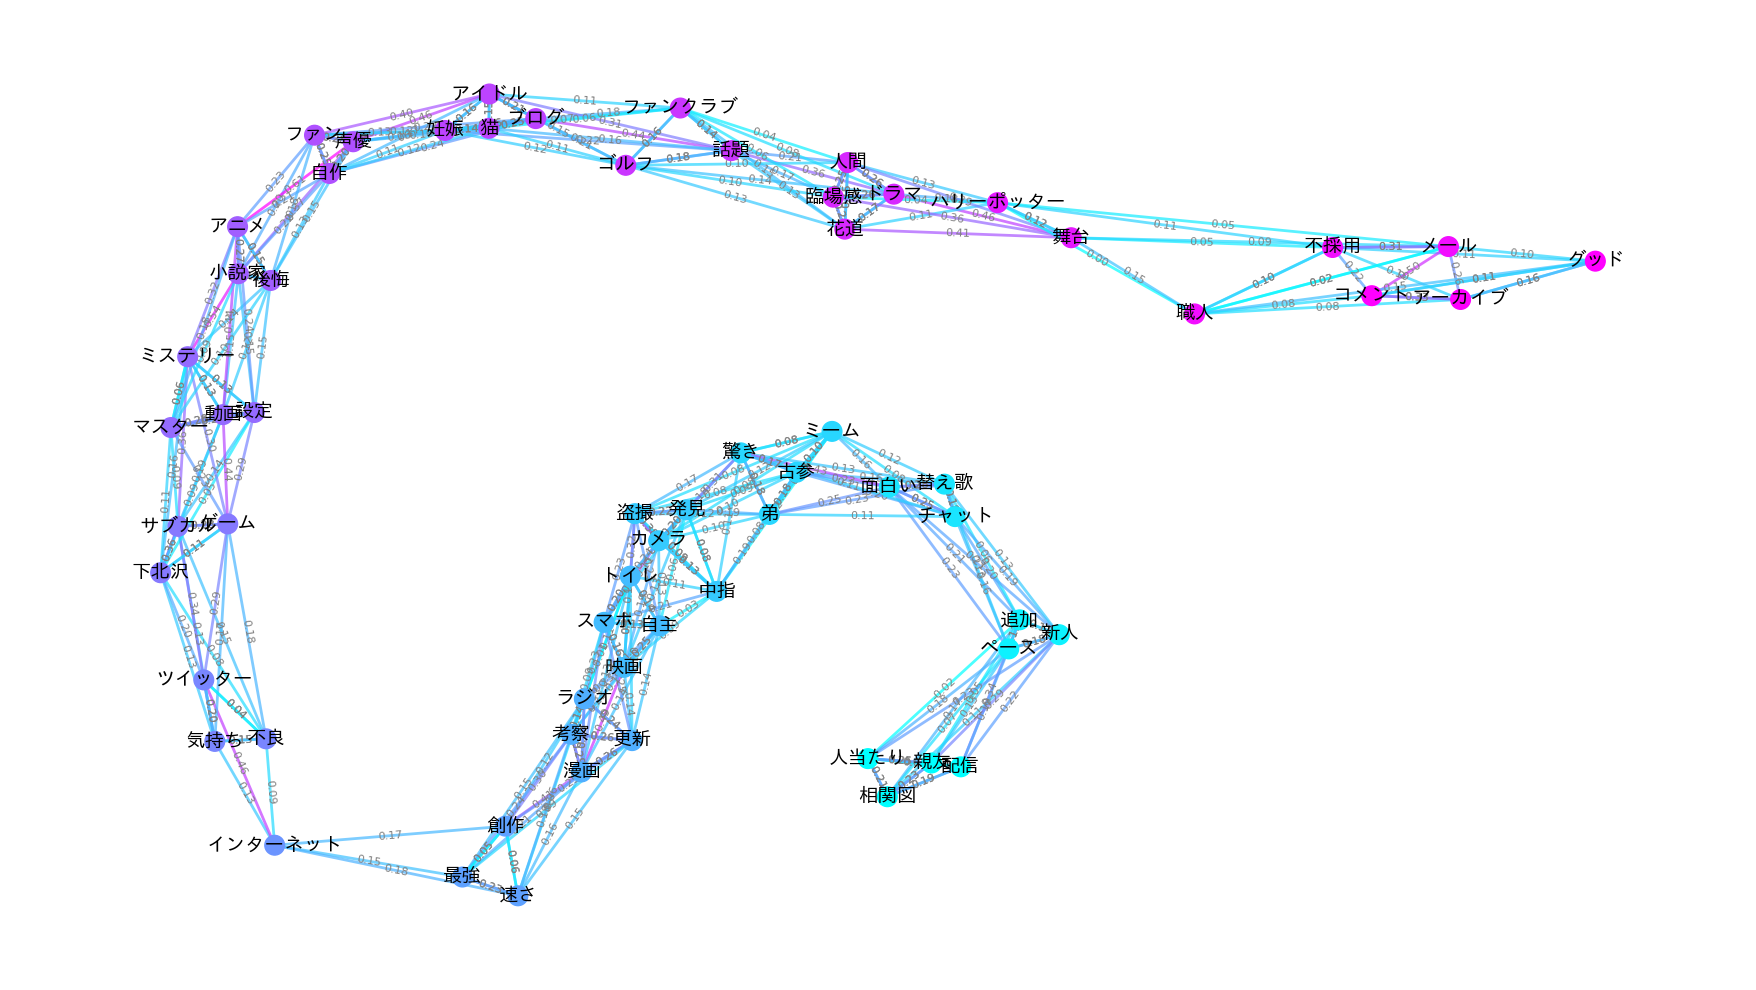

In [10]:
# NetworkXのグラフオブジェクトを作成する
G = nx.DiGraph()

# グラフにノードを追加する
#for i in range(len(word_list)):
 #   G.add_node(word_list[i])

counter = 0
i=0
node_colors = []
L = []
# グラフにエッジを追加する
for row in words:
    i +=1
    my_dict = {}
    #print( str(i) + '行目')
    # 行の要素ごと
    j = 0
    for word in row:
        j +=1
        if word!='':
            #print(word)
            G.add_node(word)
            #L.append(word)
            node_colors.append(i-1)
            counter+=1
            if i != len(words):# 最後以外の行
                # 同話題内の単語との相関計算
                for word_same in row:
                    if word_same!='':
                        if word_same!=word:
                            G.add_edge(word, word_same, weight=wv.similarity(word,word_same))
                # 次の話題の単語との相関計算
                for word_next in words[i]:
                    if word_next!='':
                        #print(word+ '   ' +word_next +'  ' +str( wv.similarity(word,word_next) ))
                        G.add_edge(word, word_next, weight=wv.similarity(word,word_next))
            else:#最後の行
                # 同話題内の単語との相関計算
                for word_same in row:
                    if word_same!='':
                        if word_same!=word:
                            G.add_edge(word, word_same, weight=wv.similarity(word,word_same))
                print('last row')



node_colors = [x / max(node_colors) for x in node_colors]


#for i in range(len(word_list)):
#    for j in range(i+1, len(word_list)):
#        if corr_matrix[i][j] != 0:
#            G.add_edge(word_list[i], word_list[j], weight=corr_matrix[i][j])

# ウェイトの最大値取得
max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
# カラーマップ生成
colmap = "cool"
cmap = plt.get_cmap(colmap)
node_color_list = [cmap(color) for color in node_colors]
# 重みの最大値を取得する
max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
edge_color_list = [cmap(edge[2]["weight"]/max_weight) for edge in G.edges(data=True)]

# グラフを描画する
plt.figure(figsize=(16*1.4, 9*1.4))
#pos = nx.spring_layout(G, weight='weight')

#pos[words[0][0]] = (0,0)
# レイアウトアルゴリズムによる座標の計算
#pos.update(nx.spring_layout(G))
pos = nx.spring_layout(G, weight='weight')
#print(pos)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=node_color_list, cmap=plt.get_cmap(colmap) )
nx.draw_networkx_labels(G, pos, font_size=14, font_family="IPAexGothic")
#labels = nx.get_edge_attributes(G, "weight")
edges = G.edges(data=True)

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_color_list, width=2, alpha=0.7, arrows=False)
labels = {(u, v): format(d['weight'], '.2f') for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,font_color='gray', font_size=8,bbox=dict(facecolor='none',edgecolor='none', alpha=1))

plt.axis("off")
plt.savefig('all_edge.png')
plt.show()



**  一番強い相関は('配信', '追加') で相関は 0.34039912  **
**  一番強い相関は('ペース', '面白い') で相関は 0.23029488  **
**  一番強い相関は('面白い', '驚き') で相関は 0.4305281  **
**  一番強い相関は('驚き', '発見') で相関は 0.31030145  **
**  一番強い相関は('カメラ', 'スマホ') で相関は 0.44820032  **
**  一番強い相関は('映画', '漫画') で相関は 0.4940202  **
**  一番強い相関は('漫画', '創作') で相関は 0.40832874  **
**  一番強い相関は('速さ', 'インターネット') で相関は 0.18305157  **
**  一番強い相関は('インターネット', 'ツイッター') で相関は 0.46340394  **
**  一番強い相関は('ツイッター', 'サブカル') で相関は 0.34476107  **
**  一番強い相関は('ゲーム', '動画') で相関は 0.4370106  **
**  一番強い相関は('ミステリー', '小説家') で相関は 0.5426341  **
**  一番強い相関は('アニメ', '声優') で相関は 0.6105809  **
**  一番強い相関は('声優', 'アイドル') で相関は 0.45943442  **
**  一番強い相関は('ブログ', '話題') で相関は 0.44110337  **
**  一番強い相関は('話題', 'ドラマ') で相関は 0.35595578  **
**  一番強い相関は('ドラマ', '舞台') で相関は 0.45852807  **
**  一番強い相関は('舞台', '職人') で相関は 0.14596796  **
**  一番強い相関は('メール', 'コメント') で相関は 0.5005928  **
last row
last row
last row


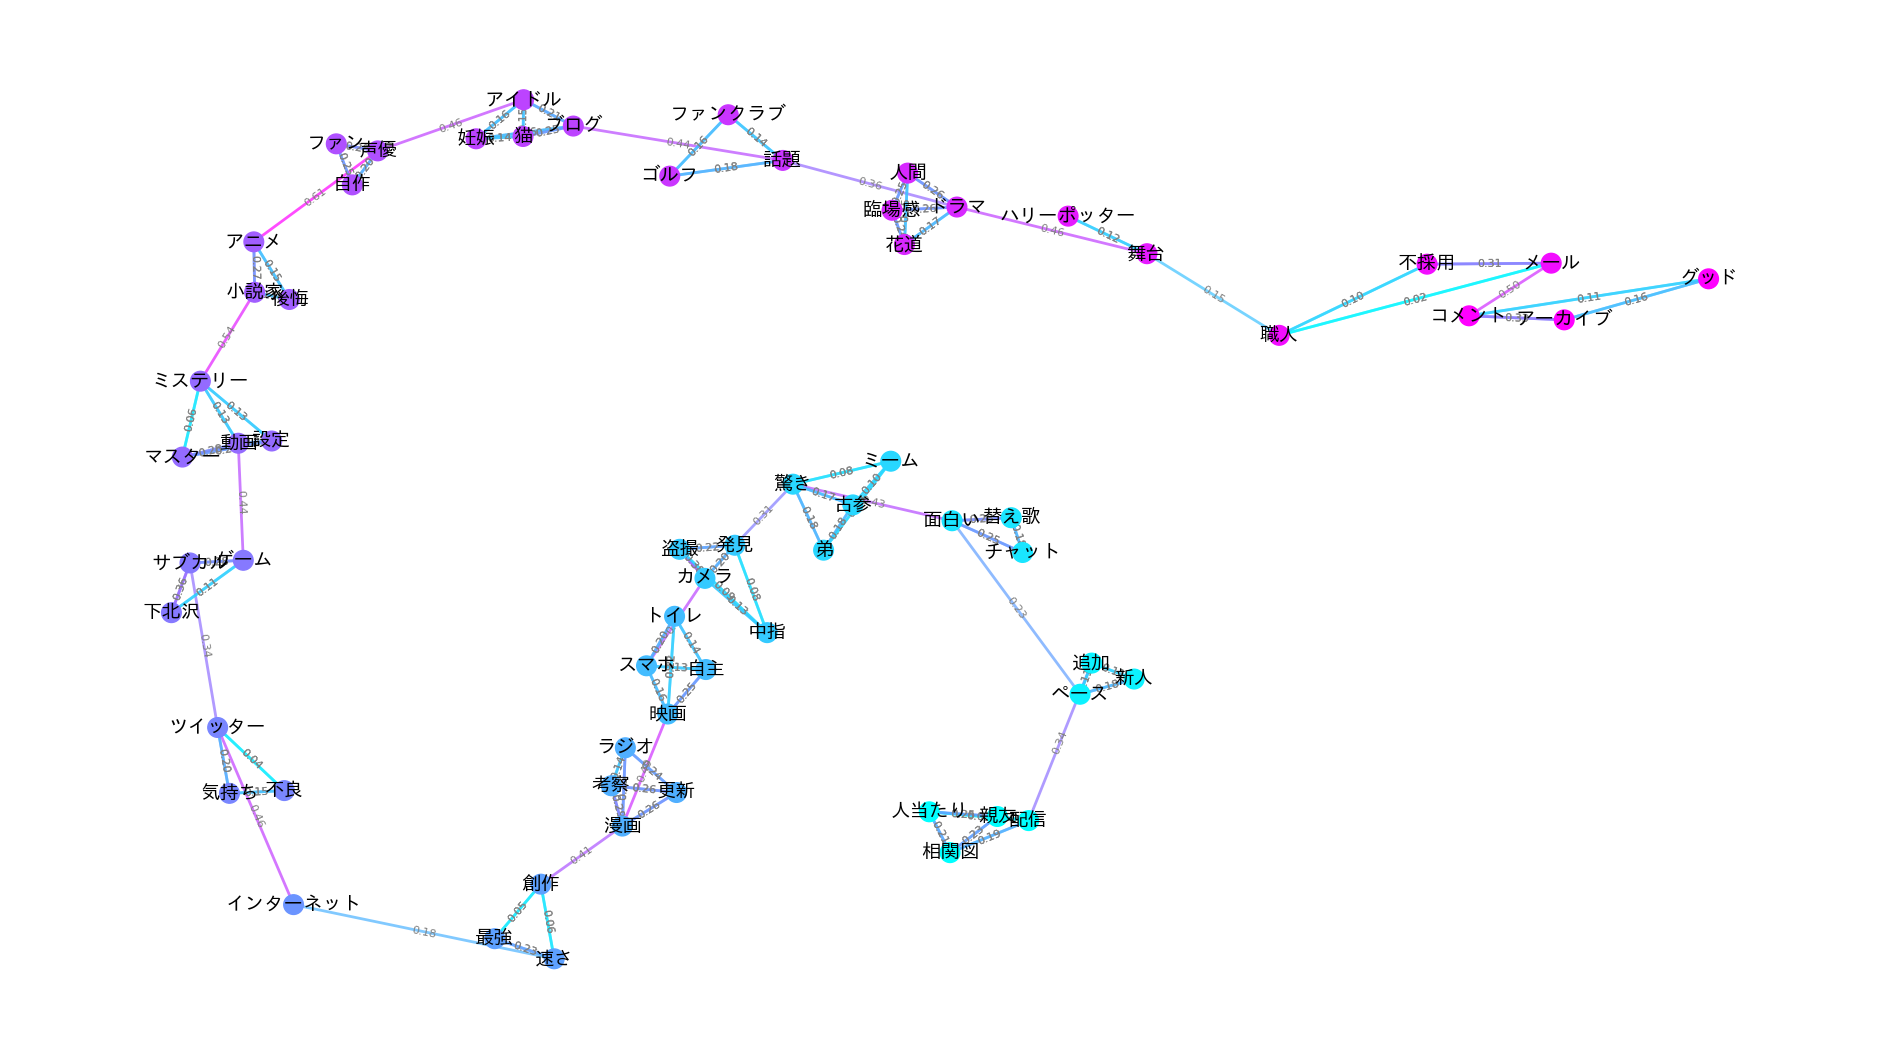

In [11]:
# NetworkXのグラフオブジェクトを作成する
G = nx.DiGraph()

# グラフにノードを追加する
#for i in range(len(word_list)):
#   G.add_node(word_list[i])

i = 0
# 1行ごと
all_dict ={}
#node_colors = []
L = []
LM = []
for row in words:
    i +=1
    my_dict = {}
    #print( str(i) + '行目')
    # 行の要素ごと
    j = 0
    for word in row:
        j += 1
        if word!='':
            G.add_node(word)
            if i != len(words):# 最後以外の行
                for word_same in row:
                    if word_same!='':
                        if word_same!=word:
                            G.add_edge(word, word_same, weight=wv.similarity(word,word_same))
                for word_next in words[i]:
                    if word_next!='':
                        # 相関値 計算
                        similarity_score = wv.similarity(word,word_next)
                        # 相関値 保存
                        my_dict[similarity_score] = (word,word_next)
                        all_dict[similarity_score] = (word,word_next)
                        # 相関値 表示
                        #print(word+' , '+word_next+' の相関： '+str(similarity_score))
            else:#最後の行
                # 同話題内の単語との相関計算
                for word_same in row:
                    if word_same!='':
                        if word_same!=word:
                            G.add_edge(word, word_same, weight=wv.similarity(word,word_same))
                print('last row')
            
    # 次の単語グループと一番相関のある単語ペア
    if i!= len(words):
        max_key = max(my_dict.keys())
        max_value = my_dict[max_key]
        print('**  一番強い相関は'+str(my_dict[max_key])+' で相関は '+str(max_key)+'  **')
        G.add_edge(my_dict[max_key][0], my_dict[max_key][1], weight=max_key)
        LM.append(max_key)




        
#node_colors = [x / max(node_colors) for x in node_colors]


#for i in range(len(word_list)):
#    for j in range(i+1, len(word_list)):
#        if corr_matrix[i][j] != 0:
#            G.add_edge(word_list[i], word_list[j], weight=corr_matrix[i][j])

# ウェイトの最大値取得
#max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
# カラーマップ生成
colmap = "cool"
cmap = plt.get_cmap(colmap)
#node_color_list = [cmap(color) for color in node_colors]
#node_color_list = 'red'
# 重みの最大値を取得する
max_weight = max([edge[2]["weight"] for edge in G.edges(data=True)])
edge_color_list = [cmap(edge[2]["weight"]/max_weight) for edge in G.edges(data=True)]

# グラフを描画する
plt.figure(figsize=(16*1.5, 9*1.5))
#pos = nx.spring_layout(G, weight='weight')
#pos = nx.spectral_layout(G, weight='weight')
#print(pos)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=node_color_list, cmap=plt.get_cmap(colmap) )
nx.draw_networkx_labels(G, pos, font_size=14, font_family="IPAexGothic")
#labels = nx.get_edge_attributes(G, "weight")
edges = G.edges(data=True)

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_color_list, width=2, alpha=0.7, arrows=False)
labels = {(u, v): format(d['weight'], '.2f') for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,font_color='gray', font_size=8,bbox=dict(facecolor='none',edgecolor='none', alpha=1))

plt.axis("off")
plt.savefig('near_edge.png')
plt.show()


In [12]:
# 相関係数の例示

# 相関を計算する単語
ws = ['ニコニコ動画', 'ユーチューブ', 'ツイッター', 'ラーメン', '東京']

# 相関を計算
for i, w in enumerate(ws):
    for w_next in ws[i+1:]:
        similarity = wv.similarity(w, w_next)
        print(f"「{w}」と「{w_next}」の相関係数は {similarity:.3f}")

「ニコニコ動画」と「ユーチューブ」の相関係数は 0.664
「ニコニコ動画」と「ツイッター」の相関係数は 0.489
「ニコニコ動画」と「ラーメン」の相関係数は 0.127
「ニコニコ動画」と「東京」の相関係数は 0.144
「ユーチューブ」と「ツイッター」の相関係数は 0.445
「ユーチューブ」と「ラーメン」の相関係数は 0.088
「ユーチューブ」と「東京」の相関係数は 0.184
「ツイッター」と「ラーメン」の相関係数は 0.142
「ツイッター」と「東京」の相関係数は 0.192
「ラーメン」と「東京」の相関係数は 0.215


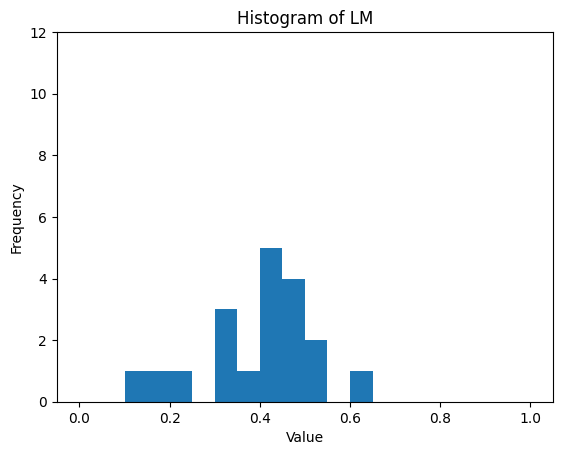

In [13]:
# 話題間の相関をヒストグラムに

plt.hist(LM, bins=20, range=(0, 1)) # ヒストグラムを作成し、10個のビンに分割
# 縦軸の範囲の設定
plt.ylim(0, 12)
plt.xlabel('Value') # x軸のラベルを設定
plt.ylabel('Frequency') # y軸のラベルを設定
plt.title('Histogram of LM') # グラフのタイトルを設定
plt.savefig('hist.png')
plt.show() # グラフを表示